In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
url = 'https://raw.githubusercontent.com/WildanBudiawanZ/pembelajaran-mesin/main/FuelConsumptionCo2.csv'
cdf = pd.read_csv(url)

cdf.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [12]:
cdf.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


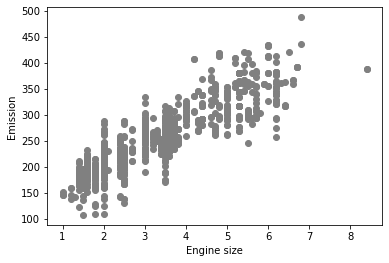

In [13]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='grey')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05)

In [15]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

/tmp/ipykernel_215/2873884004.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))


RandomForestRegressor(n_estimators=10, random_state=0)

In [16]:
# get the "engine size" as the independent variable (regressor)
X = cdf.iloc[:, 4].values

# get the "emission" as the dependent variable
y = cdf.iloc[:, 12].values


# Reshape data because only use one features in "engine size"
X = X.reshape(-1,1)

# Reshape data because only one features
y = y.reshape(-1,1)

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [18]:
# Predicting a new result
y_pred = regressor.predict(sc_X.transform(np.array([[1.3]])))

y_pred = y_pred.reshape(-1, 1)
y_pred = sc_y.inverse_transform(y_pred)
y_pred

array([[147.03106049]])

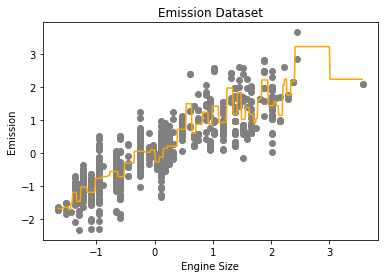

In [19]:
# Visualising the Random Forest Regression results (higher resolution) with scaling value
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'grey')
plt.plot(X_grid, regressor.predict(X_grid), color = 'orange')
plt.title('Emission Dataset')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show()